# SQLite Workshop

### Load Libraries

In [1]:
import sqlite3
import pandas as pd

### Load GitHub repo

In [ ]:
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

### Connect to Database

In [2]:
conn = sqlite3.connect('sqlite_workshop.db')
cursor = conn.cursor()
print("Opened database successfully");

Opened database successfully


### Delete tables if exists

In [3]:
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
#cursor.execute("DROP TABLE IF EXISTS producer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")
#cursor.execute("DROP TABLE IF EXISTS employee_sells_to_customer")

### Delete tables for Part 1

In [4]:
cursor.execute("DROP TABLE IF EXISTS Liga")
cursor.execute("DROP TABLE IF EXISTS Verein")
cursor.execute("DROP TABLE IF EXISTS Spieler")

### create Tables for Part 1

In [5]:
cursor.execute('''
		CREATE TABLE IF NOT EXISTS Liga (
            L_name nvarchar(80) primary key,
            Anzahl_Vereine int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS Verein (
			V_name nvarchar(80) primary key,
            Liga nvarchar(80),
            Anzahl_Meisterschaften int,
            foreign key(Liga) references Liga(L_name)

			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS Spieler (
			S_name nvarchar(80) primary key,
            Verein nvarchar(80),
            foreign key(Verein) references Verein(V_name)

			)
               ''')

### fill Tables for Part 1

In [6]:
cursor.execute('''
		INSERT INTO Liga (L_name,Anzahl_Vereine)
            VALUES
            ("1. Bundesliga", 18),
            ("2. Bundesliga", 18), 
            ("3. Bundesliga",20)

			
               ''')

cursor.execute('''
		INSERT INTO Verein (V_name, Liga, Anzahl_Meisterschaften)
            VALUES
            ("1. FC Bayern Muenchen", "1. Bundesliga", 32),
            ("2. FC Kaiserslautern", "3. Bundesliga", 4), 
            ( "SV Waldhof Mannheim", "3. Bundesliga", 0)

			
               ''')
cursor.execute('''
		INSERT INTO Spieler (S_name, Verein)
            VALUES
            ("Manuel Neuer","1. FC Bayern Muenchen"),
            ("Matheo Raab", "1. FC Kaiserslautern"), 
            ("Timo Koenigsmann", "SV Waldhof Mannheim")

			
               ''')

## Teil 1

In [7]:
#Tabellennamen herausfinden
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))

      name
0     Liga
1   Verein
2  Spieler


In [8]:
# Private Keys herausfinden
print(pd.read_sql_query("PRAGMA table_info('Liga')", conn))
print(pd.read_sql_query("PRAGMA table_info('Verein')", conn))
print(pd.read_sql_query("PRAGMA table_info('Spieler')", conn))

   cid            name          type  notnull dflt_value  pk
0    0          L_name  nvarchar(80)        0       None   1
1    1  Anzahl_Vereine           int        0       None   0
   cid                    name          type  notnull dflt_value  pk
0    0                  V_name  nvarchar(80)        0       None   1
1    1                    Liga  nvarchar(80)        0       None   0
2    2  Anzahl_Meisterschaften           int        0       None   0
   cid    name          type  notnull dflt_value  pk
0    0  S_name  nvarchar(80)        0       None   1
1    1  Verein  nvarchar(80)        0       None   0


In [9]:
#Foreign keys herausfinden
print(pd.read_sql_query("PRAGMA foreign_key_list('Liga')", conn))
print("----------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('Verein')", conn))
print("----------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('Spieler')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []
----------------------------------------
   id  seq table  from      to  on_update  on_delete match
0   0    0  Liga  Liga  L_name  NO ACTION  NO ACTION  NONE
----------------------------------------
   id  seq   table    from      to  on_update  on_delete match
0   0    0  Verein  Verein  V_name  NO ACTION  NO ACTION  NONE


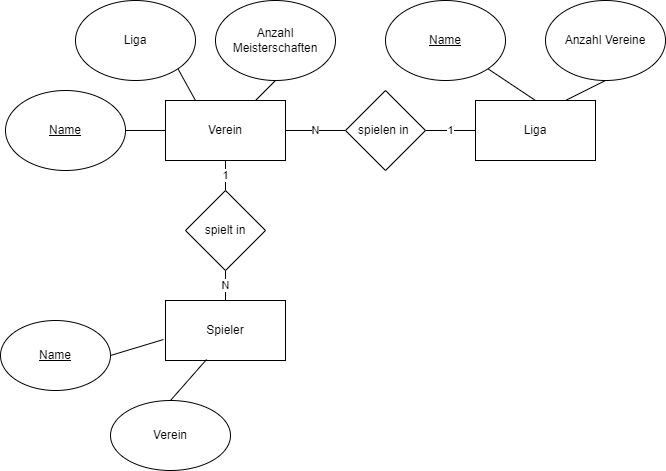

In [10]:
#tabellen ausgeben
print(pd.read_sql_query("SELECT * FROM Liga", conn))
print("----------------------------------------")
print(pd.read_sql_query("SELECT * FROM Verein", conn))
print("----------------------------------------")
print(pd.read_sql_query("SELECT * FROM Spieler", conn))

          L_name  Anzahl_Vereine
0  1. Bundesliga              18
1  2. Bundesliga              18
2  3. Bundesliga              20
----------------------------------------
                  V_name           Liga  Anzahl_Meisterschaften
0  1. FC Bayern Muenchen  1. Bundesliga                      32
1   2. FC Kaiserslautern  3. Bundesliga                       4
2    SV Waldhof Mannheim  3. Bundesliga                       0
----------------------------------------
             S_name                 Verein
0      Manuel Neuer  1. FC Bayern Muenchen
1       Matheo Raab   1. FC Kaiserslautern
2  Timo Koenigsmann    SV Waldhof Mannheim


### Load CSVs into Dataframe

In [ ]:
food = pd.read_csv('tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('tables/initial_tables/Customer_buys_Food.csv', sep=";")

### Create Tables

In [ ]:
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

### Insert Dataframe in Table

In [ ]:
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

### Output table contents

In [ ]:
print(pd.read_sql_query("SELECT * FROM customer", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM food", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM animals", conn))

In [ ]:
print(pd.read_sql_query("SELECT * FROM orders", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM employee", conn))
print("--------------------------------------------------------")
print("Tab customer_buys_food")
print(pd.read_sql_query("SELECT * FROM customer_buys_food", conn))
print("--------------------------------------------------------")

### Output Table Info


In [ ]:
print(pd.read_sql_query("PRAGMA table_info('orders')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

In [ ]:
print(pd.read_sql_query("PRAGMA table_info('customer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('customer_buys_food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('employee')", conn))

### Get foreign keys
Emtpy DataFrame means there are no foreign keys

Orders table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('orders')", conn))

Food table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('food')", conn))

Animals table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('Animals')", conn))

Customer Table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('customer')", conn))

Customer_buys_food table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('customer_buys_food')", conn))

Employee_sells_to_customer table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('employee_sells_to_customer')", conn))

Employee table

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('employee')", conn))

### INNER JOIN

SQLite INNER JOIN gibt die Datensätze zurück, bei denen sich tabel1 und tabel2 überschneiden.

In [ ]:
print(pd.read_sql_query('''
SELECT animals.name,food.name as f_name FROM animals 
        INNER JOIN food ON animals.food = food.food_ID''', conn))

###  LEFT JOIN

SQLite LEFT OUTER JOIN gibt alle Datensätze aus tabele1 und nur die Datensätze aus tabele2 zurück, die sich mit Tabelle1 überschneiden.

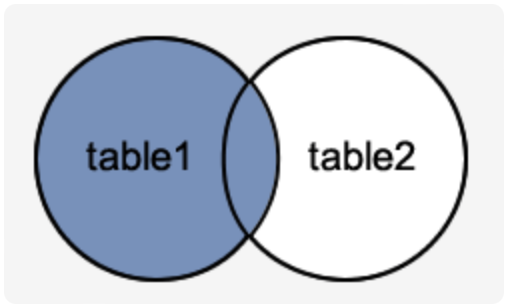

In [ ]:
print(pd.read_sql_query('''
    SELECT customer.name, customer_buys_food.amount FROM customer
    LEFT JOIN customer_buys_food ON customer.customer_ID = customer_buys_food.C_ID''', conn
    ))

###  MULTIPLE JOIN

In [ ]:
##Wie viel Geld hat jeder Kunder ausgegeben?
print(pd.read_sql_query('''
    SELECT 
    customer.name, customer_buys_food.amount,food.price_per_kg,
    food.price_per_kg*customer_buys_food.amount as sum
    FROM customer
    LEFT JOIN 
    customer_buys_food  ON customer.customer_ID = customer_buys_food.C_ID
    INNER JOIN 
    food ON customer_buys_food.F_ID = food.food_ID 
    GROUP BY customer.name
    ''', conn))

In [ ]:
##Subselct
print(pd.read_sql_query('''
    SELECT * FROM orders
    WHERE orders.order_Nr IN
        (SELECT customer_buys_food.O_ID FROM customer_buys_food
    WHERE customer_buys_food.E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000))
    ''', conn))

In [ ]:
###Subselect
print(pd.read_sql_query('''
 SELECT * FROM customer_buys_food
    WHERE customer_buys_food.E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000)
    ''', conn))

In [ ]:
cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
conn.commit()


cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')

conn.commit()


cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin)
                  SELECT food_ID, name, price_per_kg, producer, origin
                  FROM food;
                  ''')
conn.commit()
cursor.execute(''' SELECT * FROM food_new;''')
cursor.execute(''' PRAGMA table_info(food_new);''')
records = cursor.fetchall()
for row in records:
  print(row)
    
cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM employee_new;''')
records = cursor.fetchall()

for row in records:
  print(row)
    
    
cursor.execute(''' SELECT * FROM customer_new;''')
cursor.execute(''' PRAGMA table_info(customer_new);''')
records = cursor.fetchall()
for row in records:
  print(row)
    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM customer_new;''')
records = cursor.fetchall()
for row in records:
  print(row)

In [ ]:
### Joins for sales table
print(pd.read_sql_query('''
    SELECT order_Nr,transact, date, C_ID as customer_id, food_ID as food_id, amount, E_ID AS employee_id FROM orders
    LEFT JOIN customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN food ON customer_buys_food.F_ID = food.food_ID 
    ''', conn))

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
                  transact,
                  date DATE,
                  custumer_id int, 
                  food_id INT,
                  amount INT,
                  employee_id INT,
                  foreign key(food_id) references food_new(food_id),
                  foreign key(custumer_id) references customer_new(cust_id),
                  foreign key(employee_id) references employee_new(empl_id)
                  );''')

In [ ]:
cursor.execute('''INSERT INTO sales( order_nr, transact, date, custumer_id, food_id, amount,employee_id )
                  SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID FROM orders
    LEFT JOIN customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN food ON customer_buys_food.F_ID = food.food_ID;
    ''')

In [ ]:
print(pd.read_sql_query("SELECT * FROM sales", conn))

In [ ]:
cursor.execute(''' PRAGMA table_info(sales);''')
records = cursor.fetchall()

### Teil 1

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesung rein :)

### Teil 2

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesung rein :)

### Teil 3

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesung rein :)

### Close connection

In [ ]:
#conn.close()